In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

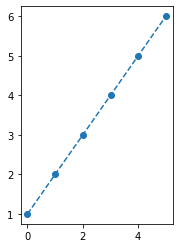

In [2]:
plt.figure()
plt.subplot(1,2,1)

l  = np.array([1,2,3,4,5,6])
plt.plot(l , '--o')
plt.show()

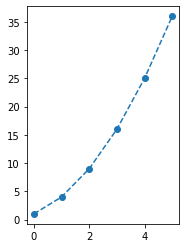

In [3]:
e = l**2
# 1 row , 2 columns
plt.subplot(1,2,2)
plt.plot(e , '--o')
plt.show()

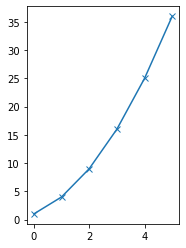

In [4]:
plt.subplot(1, 2, 1)
plt.plot(e, '-x')
plt.show()

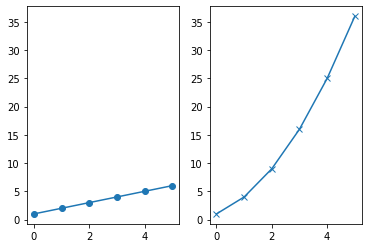

In [5]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(l, '-o')

# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(e, '-x')

True

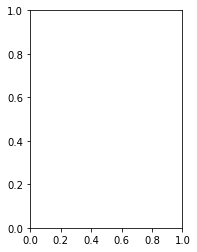

In [6]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1,2,1) == plt.subplot(121)

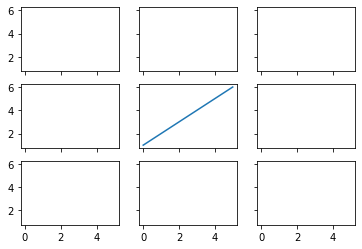

In [7]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
ax5.plot(l, '-')

In [8]:
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

<Figure size 432x288 with 0 Axes>

In [9]:
plt.gcf().canvas.draw()

<Figure size 432x288 with 0 Axes>

### Histograms

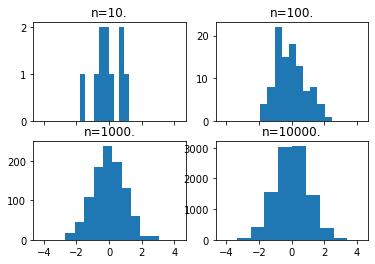

In [10]:
fig,((ax1, ax2)  , (ax3 ,ax4)) = plt.subplots(2,2 ,sharex =True) #축공유
axs = [ax1, ax2, ax3 ,ax4]

for n in range(0 , len(axs)) :
    sample_size = 10 **(n+1)
    s = np.random.normal(loc = 0.0 , scale = 1.0 , size = sample_size)
    axs[n].hist(s)
    axs[n].set_title(f'n={sample_size}.')

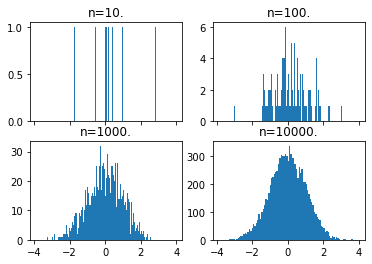

In [11]:
fig,((ax1, ax2)  , (ax3 ,ax4)) = plt.subplots(2,2 ,sharex =True) #축공유
axs = [ax1, ax2, ax3 ,ax4]

for n in range(0 , len(axs)) :
    sample_size = 10 **(n+1)
    s = np.random.normal(loc = 0.0 , scale = 1.0 , size = sample_size)
    axs[n].hist(s, bins =100 )
    axs[n].set_title(f'n={sample_size}.')

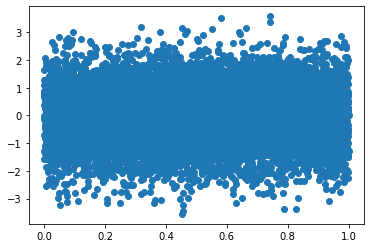

In [12]:
plt.figure()
y = np.random.normal(loc = 0.0 , scale = 1.0 , size = 10000)
x = np.random.random (size = 10000)
plt.scatter(x,y)

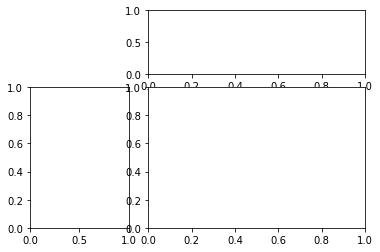

In [13]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [14]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

In [15]:
# 히스토그램 위치 조정 
top_histogram.clear()
top_histogram.hist(X, bins=100)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal')
# flip the side histogram's x axis
side_histogram.invert_xaxis()

In [16]:
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

### Box Plots

In [17]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [18]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.011688,0.501160,1.976606
std,1.007347,0.291198,1.406907
min,-4.522757,0.000028,0.016319
25%,-0.650086,0.248044,0.952848
50%,0.015996,0.498465,1.641921
75%,0.684183,0.755557,2.671614
max,4.081432,0.999935,11.992951


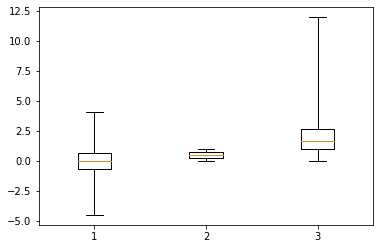

In [19]:
plt.figure()
plt.boxplot(df, whis = 'range')
plt.show()

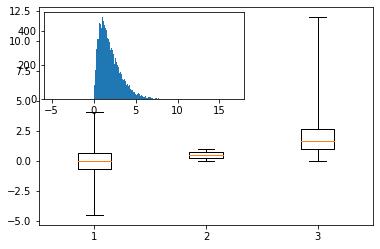

In [20]:
# Create an inset axes with a given width and height
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [21]:
# 히스토그램의 y축을 변경 
ax2.yaxis.tick_right()

### Heatmaps

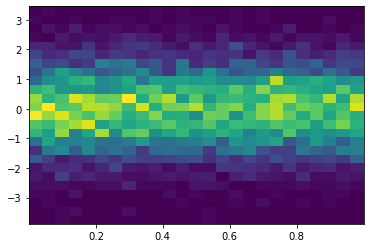

In [22]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

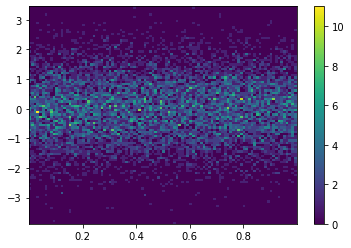

In [23]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)
plt.colorbar()

### Animations

In [31]:
%matplotlib notebook
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [32]:
def update(c) :
    if c == n :
        # check if animation is at the last frame, and if so, stop the animation a
        # 만약 현재상황이 100개까지 왔다면 그만한다.
        a.event_source.stop()
    plt.cla() #current axis를 초기화해줍니다.
    bins = np.arange(-4,4,0.5)
    plt.hist(x[:c], bins = bins)
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(c), [3,27])

<IPython.core.display.Javascript object>


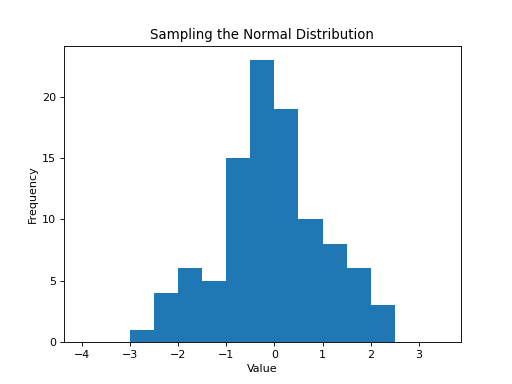

In [33]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100) # 지정한 함수를 반복적으로 호출함으로써 애니메이션 생성

### Interactivity


5

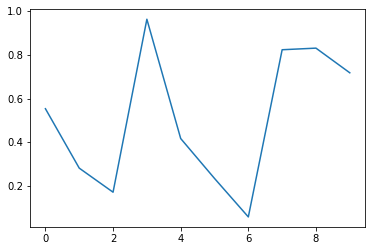

In [27]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [28]:
from random import shuffle
origins = ['Korea', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,weight,origin
0,0.762962,0.255233,Canada
1,0.001124,0.142069,Germany
2,0.252434,0.151688,Mexico
3,0.854421,0.659474,Korea
4,0.446222,0.240315,USA
5,0.868970,0.239383,UK
6,0.166381,0.379805,Chile
7,0.174235,0.903458,Brazil
8,0.031909,0.121574,India
9,0.757311,0.389152,Iraq


Text(0.5, 0, 'Height')

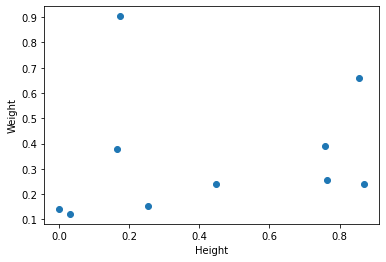

In [29]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [30]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

5

<Figure size 432x288 with 0 Axes>